### Bag of Words

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

allsentences = ["This pasta is very tasty and affordable.", 
                "This pasta is not tasty and is not affordable.", 
                "This pasta is very very delicious."]

countvertorizer = CountVectorizer()

X = countvertorizer.fit_transform(allsentences)

result = X.toarray()
print(f"Result of Bag of Words {result}")

Result of Bag of Words [[1 1 0 1 0 1 1 1 1]
 [1 1 0 2 2 1 1 1 0]
 [0 0 1 1 0 1 0 1 2]]


### TF-IDF

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

allsentences = ["This pasta is very tasty and affordable.", 
                "This pasta is not tasty and is not affordable.", 
                "This pasta is very very delicious."]

vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform(allsentences)
features_names = vectorizer.get_feature_names_out()
print(f"Feature names \n{features_names}")

matrix = vectors.todense()
denselist = matrix.tolist()

df = pd.DataFrame(denselist, columns=features_names)
print(f"Final Result of Tf-Idf \n {df}")

Feature names 
['affordable' 'and' 'delicious' 'is' 'not' 'pasta' 'tasty' 'this' 'very']
Final Result of Tf-Idf 
    affordable       and  delicious        is       not     pasta     tasty  \
0    0.414896  0.414896   0.000000  0.322204  0.000000  0.322204  0.414896   
1    0.271822  0.271822   0.000000  0.422187  0.714826  0.211094  0.271822   
2    0.000000  0.000000   0.478909  0.282851  0.000000  0.282851  0.000000   

       this      very  
0  0.322204  0.414896  
1  0.211094  0.000000  
2  0.282851  0.728445  


### Word2vec

In [3]:
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

In [4]:
with open("./exemple_text.txt", 'r', encoding='utf-8') as txt:
    sentences = txt.readlines()

print(f"Number of sentences {len(sentences)}")

print(f"First snetence from text file \n {sentences[0]}")

Number of sentences 5
First snetence from text file 
 The names "John Doe" for males, "Jane Doe" or "Jane Roe" for females, or "Jonnie Doe" and "Janie Doe" for children, or just "Doe" non-gender-specifically are used as placeholder names for a party whose true identity is unknown or must be withheld in a legal action, case, or discussion. The names are also used to refer to acorpse or hospital patient whose identity is unknown. This practice is widely used in the United States and Canada, but is rarely used in other English-speaking countries including the United Kingdom itself, from where the use of "John Doe" in a legal context originates. The names Joe Bloggs or John Smith are used in the UK instead, as well as in Australia and New Zealand.



In [5]:
# removing punctuations
for index in range(len(sentences)):
    sentences[index] = re.sub("[^a-zA-Z]"," ", str(sentences[index]))

print(f"First sentences after removing punctuations \n {sentences[0]}")

First sentences after removing punctuations 
 The names  John Doe  for males   Jane Doe  or  Jane Roe  for females  or  Jonnie Doe  and  Janie Doe  for children  or just  Doe  non gender specifically are used as placeholder names for a party whose true identity is unknown or must be withheld in a legal action  case  or discussion  The names are also used to refer to acorpse or hospital patient whose identity is unknown  This practice is widely used in the United States and Canada  but is rarely used in other English speaking countries including the United Kingdom itself  from where the use of  John Doe  in a legal context originates  The names Joe Bloggs or John Smith are used in the UK instead  as well as in Australia and New Zealand  


In [6]:
# Tokenization
word_tokenizer = []
for sent in sentences:
    word_tokens = word_tokenize(sent)
    word_tokenizer.append(word_tokens)

print(f"First sentence after tokenize \n {word_tokenizer[0]}")

First sentence after tokenize 
 ['The', 'names', 'John', 'Doe', 'for', 'males', 'Jane', 'Doe', 'or', 'Jane', 'Roe', 'for', 'females', 'or', 'Jonnie', 'Doe', 'and', 'Janie', 'Doe', 'for', 'children', 'or', 'just', 'Doe', 'non', 'gender', 'specifically', 'are', 'used', 'as', 'placeholder', 'names', 'for', 'a', 'party', 'whose', 'true', 'identity', 'is', 'unknown', 'or', 'must', 'be', 'withheld', 'in', 'a', 'legal', 'action', 'case', 'or', 'discussion', 'The', 'names', 'are', 'also', 'used', 'to', 'refer', 'to', 'acorpse', 'or', 'hospital', 'patient', 'whose', 'identity', 'is', 'unknown', 'This', 'practice', 'is', 'widely', 'used', 'in', 'the', 'United', 'States', 'and', 'Canada', 'but', 'is', 'rarely', 'used', 'in', 'other', 'English', 'speaking', 'countries', 'including', 'the', 'United', 'Kingdom', 'itself', 'from', 'where', 'the', 'use', 'of', 'John', 'Doe', 'in', 'a', 'legal', 'context', 'originates', 'The', 'names', 'Joe', 'Bloggs', 'or', 'John', 'Smith', 'are', 'used', 'in', 'the',

In [7]:
from gensim.models import Word2Vec

model_cbow = Word2Vec(sentences=word_tokenizer,
                      vector_size=2, # number of dimensions default 100
                      window=2, # window size default 5
                      min_count=2, # minimum count of words to be considered default 5
                      workers=1, # workers default 3
                      sg=0 # method 0 for CBOW and 1 for skip gram
                      )

words_cbow = list(model_cbow.wv.key_to_index)
print(f"Total number of words {len(words_cbow)}")

# we can get word embedding value for a particular word
print(model_cbow.wv.__getitem__('The'))

Total number of words 51
[ 0.00230103 -0.23501188]


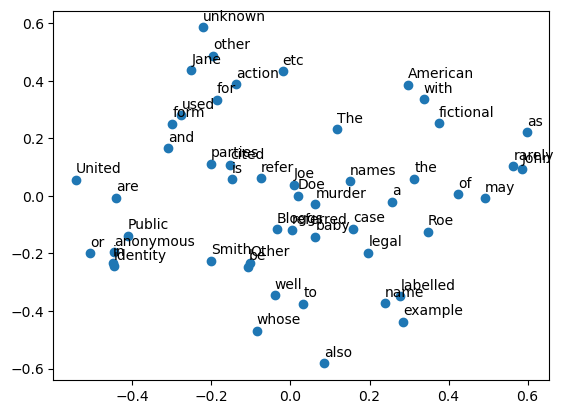

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = model_cbow.wv.__getitem__(model_cbow.wv.key_to_index)

# create 2D model using PCA
pca_model = PCA(n_components=2)
result = pca_model.fit_transform(X)

# visualize pca model using matplotlib
plt.scatter(result[:, 0], result[:, 1])

words_cbow = list(model_cbow.wv.key_to_index)

for i, word in enumerate(words_cbow[:100]):
    plt.annotate(text=word, xy=(result[i, 0], result[i, 1]), textcoords='offset points', xytext=(0, 5))

plt.show()

### Skip-gram Method

In [9]:
# import word2vec class from gensim
from gensim.models import Word2Vec

# apply word2vec to sentences
model_skip = Word2Vec(sentences=word_tokenizer,
                      vector_size=2, # number of dimensions default 100
                      window=2, # window size default 5
                      min_count=4, # minimum count of words to be consider default 5
                      workers=1, # workers default 3
                      sg=1 # method 1 for CBOW and 1 for skip gram
                     )

# total vocabulary words for word2vec model
words = list(model_skip.wv.key_to_index)
print(f"Total number of words {len(words)}")

# we can get word embedding value for a particular word
wordembedding = model_skip.wv.__getitem__('The')
print(wordembedding)

Total number of words 22
[-0.43933824 -0.22514544]


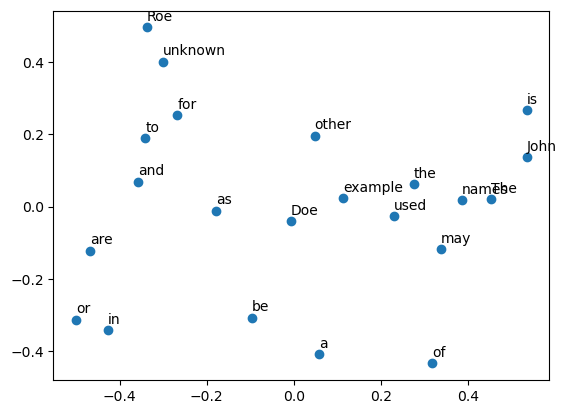

In [10]:
X = model_skip.wv.__getitem__(model_skip.wv.key_to_index)

# create 2D model using PCA

pca_model = PCA(n_components=2)

result = pca_model.fit_transform(X)

# visualize pca model using matplotlib

plt.scatter(result[:,0], result[:,1])

words_skip = list(model_skip.wv.key_to_index)

for i, word in enumerate(words_skip[:100]):
    plt.annotate(text=word, xy=(result[i, 0], result[i, 1]), textcoords='offset points', xytext=(0, 5))
    
plt.show()

# Word Enbedding using a pretrained model

In [11]:
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'

In [ ]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(f"Result ? mark in the following sentece King - man = ? - woman :- {result}")

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

input_file = "glove.6B.100d.txt"
output_file = "glove.6B.100d.txt.word2vec"

glove2word2vec(input_file, word2vec_output_file=output_file)

model = KeyedVectors.load_word2vec_format(output_file, binary=False)

result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(f"Result: {result}") 